### Assigning closest AU's to activated regions

* Happiness	6+12 (Cheek Raiser, Lip Corner Puller)

* Sadness	1+4+15 (Inner Brow Raiser, Brow Lowerer, Lip Corner Depressor)

* Surprise	1+2+5B+26 (Inner Brow Raiser, Outer Brow Raiser, Jaw Drop)

* Fear	1+2+4+5+7+20+26 (Inner Brow Raiser, Outer Brow Raiser, Brow Lowerer, Upper Lid Raiser, Lid Tightener, Lip stretcher, Jaw Drop)

* Anger	4+5+7+23 (Brow Lowerer, Upper Lid Raiser, Lid Tightener, Lip Tightener)

* Disgust	9+15+16 (Nose Wrinkler, Lip Corner Depressor, Lower Lip Depressor)

<!-- <img src="data/landmarks_to_face.png"> -->

### Landmark locations to landmark numbers

In [1]:
def get_landmark_nb_dict(all_landmarks):
    xy_to_landmark = {}

    x_s = all_landmarks[0:][::2]
    y_s = all_landmarks[1:][::2]
    i_s = range(len(x_s))

    for i, x, y in zip(i_s, x_s, y_s):
        xy_to_landmark[int(x),int(y)] = i
        
    return xy_to_landmark

In [2]:
def range_to_landmark_nb(landmark_list, landmark_dict):
    landmark_numbers = []
    for x,y in zip(landmark_list[0:][::2], landmark_list[1:][::2]):
        landmark_numbers.append(landmark_dict[int(x),int(y)])
    return landmark_numbers

In [3]:
emotion_to_landmark_nb = {
    'Happiness': [1,2,14,15, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
    'Sadness': [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
    'Surprise': [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67],
    'Fear': [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,60, 61, 62, 63, 64, 65, 66, 67],
    'Anger': [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
    'Disgust': [27, 28, 29, 30, 31, 32, 33, 34, 35, 55, 56, 57, 58, 59]
}

In [4]:
face_to_landmark = {
    'left-cheek' : [1, 2],
    'chin': [5, 6, 7, 8, 9, 10, 11],
    'right-cheek': [14, 15],
    'left-brow': [17, 18, 19, 20, 21],
    'right-brow': [22, 23, 24, 25, 26],
    'nose': [27, 28, 29, 30, 31, 32, 33, 34, 35],
    'left-eye' : [36, 37, 38, 39, 40, 41],
    'right-eye': [42, 43, 44, 45, 46, 47],
    'upper-lip': [48, 49, 50, 51, 52, 53, 54],
    'lower-lip': [55, 56, 57, 58, 59],
    'mouth': [60, 61, 62, 63, 64, 65, 66, 67]
}

In [5]:
def get_au_landmark_accuracy(emotion_label, activated_landmarks):
    au_landmarks = emotion_to_landmark_nb[emotion_label]
    correct = list(set(au_landmarks) & set(activated_landmarks))
    return len(correct)/len(au_landmarks)

In [6]:
get_au_landmark_accuracy('Anger', [3,5,17])

0.029411764705882353

In [7]:
# face_to_landmark = {
#     'left-cheek' : range(2,6),
#     'chin': range(10,24),
#     'right-cheek': range(28,32),
#     'left-brow': range(34,44),
#     'right-brow': range(44,54),
#     'nose': range(54,72),
#     'left-eye' : range(72,84),
#     'right-eye': range(84,96),
#     'upper-lip': range(96,110),
#     'lower-lip': range(110,120),
#     'mouth': range(120,136)
# }

In [8]:
emotionDict7 = {0: 'Neutral', 1: 'Happiness', 2: 'Sadness', 3: 'Surprise', 4: 'Fear', 5: 'Disgust', 6: 'Anger'}

In [9]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [10]:
from keras.backend.tensorflow_backend import set_session
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

set_session(tf.Session(config=config))

Using TensorFlow backend.


In [11]:
import sys
print(sys.path)
sys.path.append('gradcam')
print(sys.path)

['', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython']
['', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython', 'gradcam']


In [12]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from grad_cam import get_gradcam
from models_old import emoDAN

In [13]:
danPath = '/home/workspace/itautkute/emotionaldan/Model2/Model2'
datasetDir = "/home/workspace/itautkute/emotionaldan/data/"
trainSet = np.load(datasetDir + "AffectnetVal_7.npz")
initLandmarks = trainSet['Landmark'][0].reshape((1,136))[0]

In [14]:
xy_to_landmarks_init = get_landmark_nb_dict(initLandmarks)
# xy_to_landmatks_init

### Mean landmarks

In [15]:
faces = np.load('data/en_face.npy')

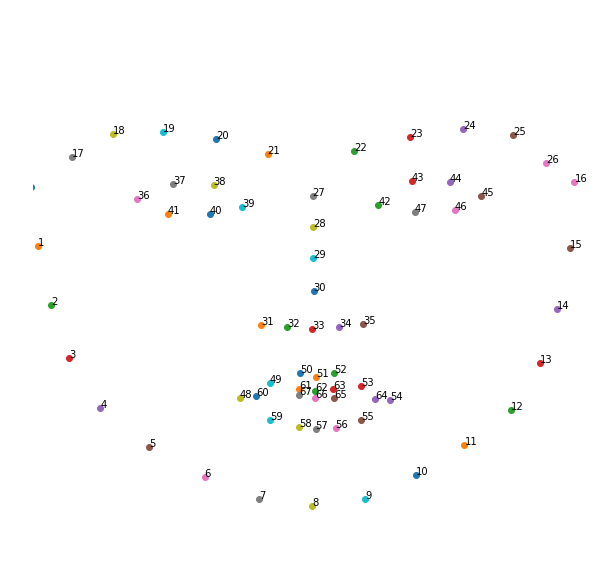

In [ ]:
# emodan = emoDAN(initLandmarks, 50)

fig = plt.figure(figsize=(10, 10))  

# initLandmarks = trainSet['Landmark'][0].reshape((1,136))[0]
lndm = initLandmarks

x_s = lndm[0:][::2]
y_s = lndm[1:][::2]

plt.xlim(0,224)
plt.ylim(0,250)
plt.gca().invert_yaxis()
plt.axis('off')
for x, y in zip(x_s, y_s):
    plt.scatter([x],[y])
    plt.annotate(xy_to_landmarks_init[int(x),int(y)], (x, y))
    
plt.savefig('graphics/landmark_numbers.png')

In [17]:
range(2,6)

range(2, 6)

In [18]:
# face_images = np.load('data/en_face_faces.npy')
# mean_cam = {}

In [19]:
def get_mean_cam(cams, show=True, return_heatmap=False):
    cams_num = [c for c in cams if (not np.isnan(c).any()) and (len(c)>0)]
#     print('Nb of images: {}, non nan: {}'.format(len(cams), len(cams_num)))
    if len(cams_num)>0:
        cams_sum = sum(cams_num)/len(cams_num)
        cam_heatmap = cv2.applyColorMap(np.uint8(255*cams_sum), cv2.COLORMAP_JET)
        cam_heatmap = cv2.cvtColor(cam_heatmap, cv2.COLOR_BGR2RGB) 
        if show:
            imgplot = plt.imshow(cam_heatmap)
        if return_heatmap:
            return cam_heatmap
        else:
            return cams_sum

### Activated landmarks

In [20]:
from grad_cam import get_most_activated_landmarks

In [40]:
def test_face_gradcams(face_gradcams):
    total_mean = []
    for i, gradcam in enumerate(face_gradcams):
        print(emotionDict7[i+1])
        gc = get_mean_cam(gradcam)
        nb_to_predict = len(emotion_to_landmark_nb[emotionDict7[i+1]])
        active_landmarks = get_most_activated_landmarks(gc, initLandmarks, k=nb_to_predict)
        active_landmarks_numbers = [xy_to_landmarks_init[a,b] for a,b in active_landmarks]

        active_landmarks_x = [x for x, _ in active_landmarks]
        active_landmarks_y = [y for  _, y in active_landmarks]

        x_s = initLandmarks[0:][::2]
        y_s = initLandmarks[1:][::2]

        for x, y in zip(x_s, y_s):
            plt.scatter([x],[y], c='grey')

        plt.scatter(active_landmarks_x,  active_landmarks_y, c = 'red')
        
        acc = get_au_landmark_accuracy(emotionDict7[i+1], active_landmarks_numbers)
        print('AU landmarks accuracy:', acc)
        total_mean.append(acc)
        
        plt.show()
    print('Total mean:', np.mean(total_mean))

Happiness
AU landmarks accuracy: 0.375


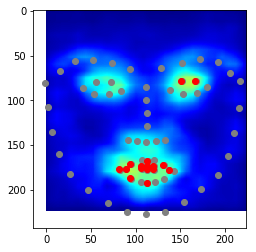

Sadness
AU landmarks accuracy: 0.45454545454545453


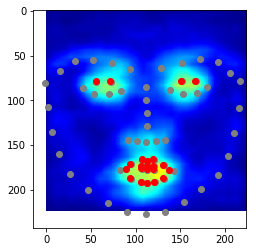

Surprise
AU landmarks accuracy: 0.5217391304347826


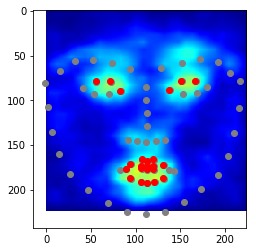

Fear
AU landmarks accuracy: 0.6333333333333333


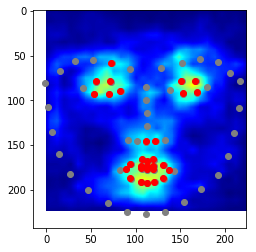

Disgust
AU landmarks accuracy: 0.21428571428571427


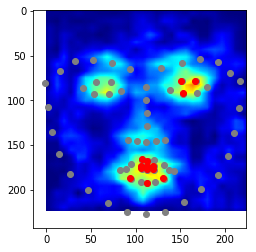

Anger
AU landmarks accuracy: 0.6470588235294118


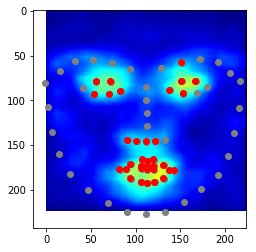

Total mean: 0.47432707602144947


In [41]:
face_gradcams = np.load('data/en_face_cams.npy')
test_face_gradcams(face_gradcams)

Happiness
AU landmarks accuracy: 0.3125


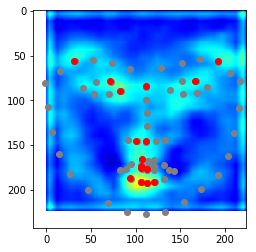

Sadness
AU landmarks accuracy: 0.4090909090909091


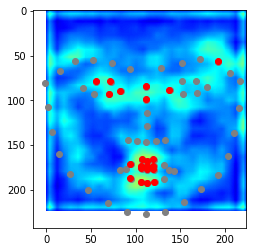

Surprise
AU landmarks accuracy: 0.4782608695652174


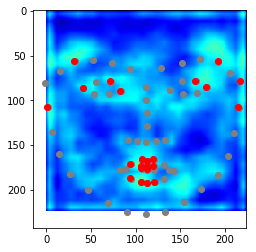

Fear
AU landmarks accuracy: 0.6


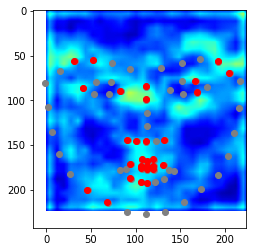

Disgust
AU landmarks accuracy: 0.42857142857142855


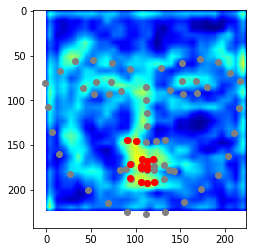

Anger
AU landmarks accuracy: 0.5588235294117647


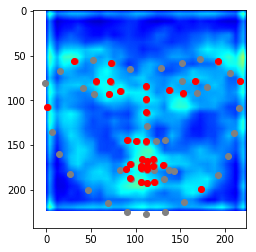

Total mean: 0.46454112277321996


In [42]:
face_gradcams = np.load('data/en_face_cams_conv_4b.npy')
test_face_gradcams(face_gradcams)

### Images grid

In [31]:
from grad_cam import find_closest_image_to_gradcam, overlay_cam
import pickle

In [28]:
with open('data/id_to_img.pkl', 'rb') as f:
    id_to_img = pickle.load(f)

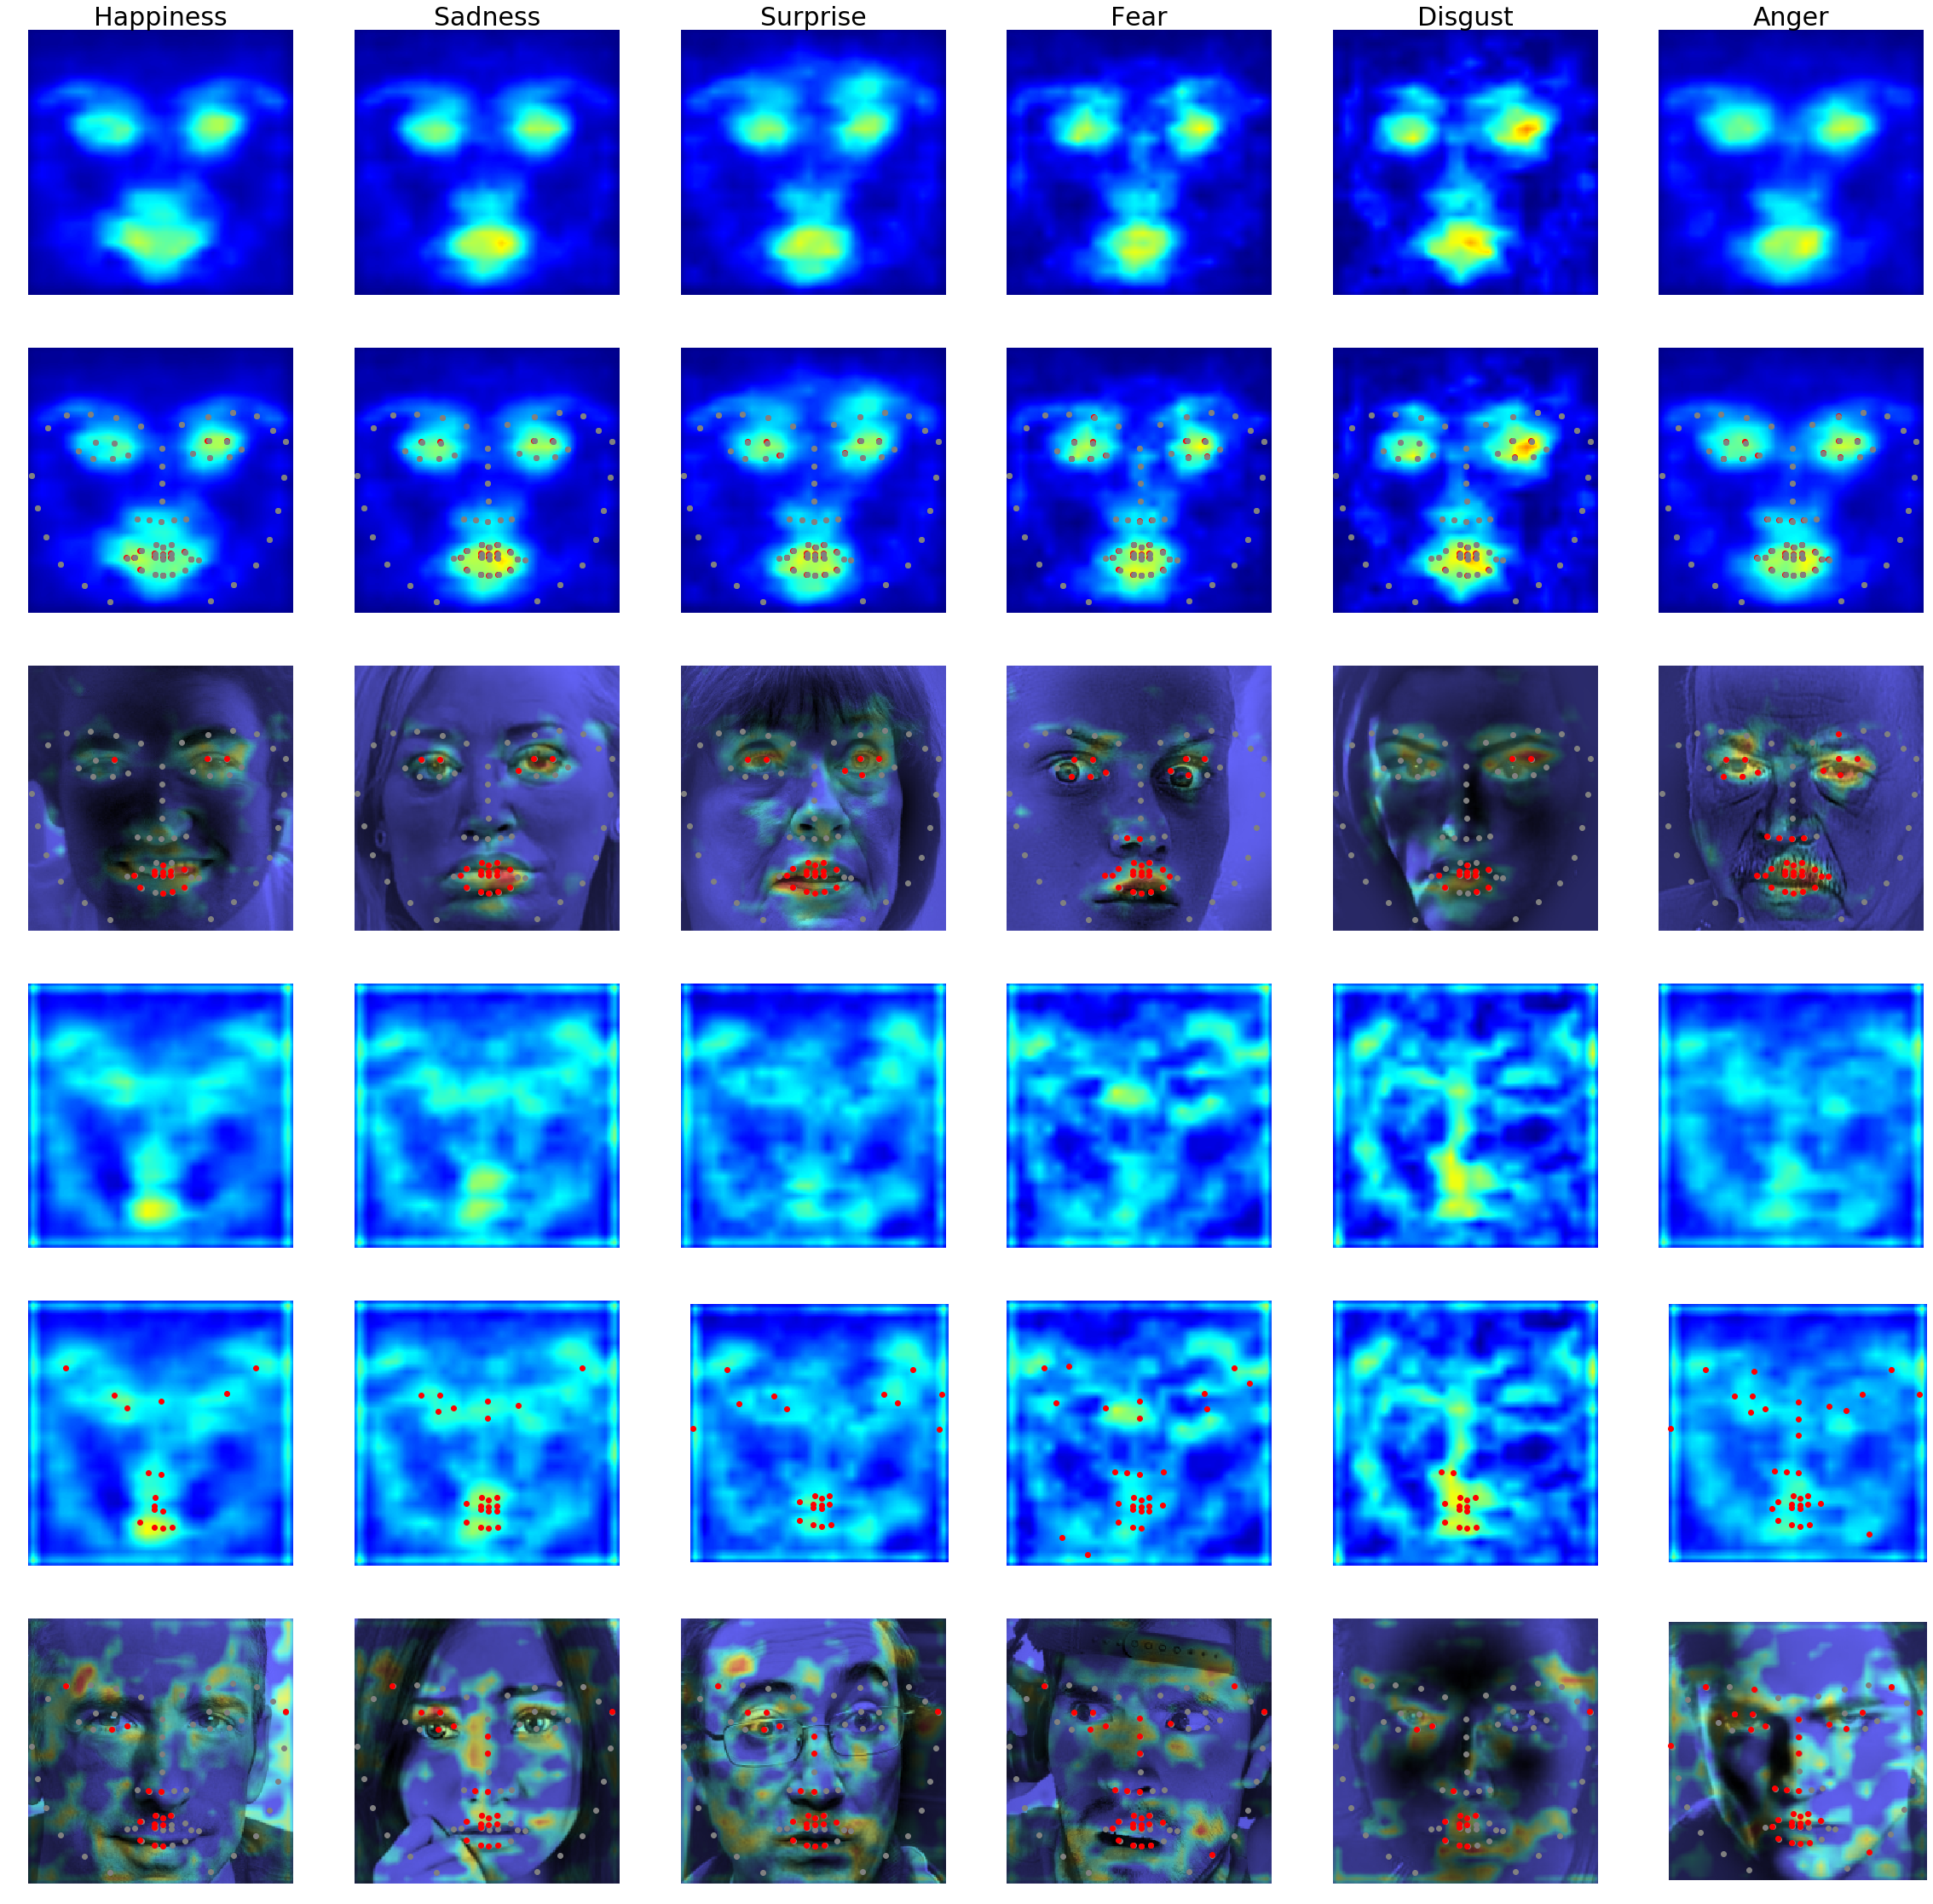

In [38]:
N, M = 6, 6

f, axarr = plt.subplots(M,N, figsize=(40,40))

## Conv 4a ### 
 
# Plot mean gradcams
face_gradcams = np.load('data/en_face_cams.npy')
for em in range(N):
    mean_cam = get_mean_cam(face_gradcams[em], show=False, return_heatmap=True)
    axarr[0,em].imshow(mean_cam)
    axarr[0,em].axis('off')
    axarr[0,em].set_title(emotionDict7[em+1], fontsize=30)
    
# Plot mean gradcams with activated landmarks
for em in range(N):
    gc = get_mean_cam(face_gradcams[em], show=False)
    mean_cam = get_mean_cam(face_gradcams[em], show=False, return_heatmap=True)
    axarr[1,em].imshow(mean_cam)
    nb_to_predict = len(emotion_to_landmark_nb[emotionDict7[em+1]])
    active_landmarks = get_most_activated_landmarks(gc, initLandmarks, k=nb_to_predict)
    active_landmarks_numbers = [xy_to_landmarks_init[a,b] for a,b in active_landmarks]

    active_landmarks_x = [x for x, _ in active_landmarks]
    active_landmarks_y = [y for  _, y in active_landmarks]

    x_s = initLandmarks[0:][::2]
    y_s = initLandmarks[1:][::2]

    for x, y in zip(x_s, y_s):
        if 0 <= x <= 224 and 0 <= y <= 224:
            axarr[1,em].scatter([x],[y], c='grey')

    axarr[1,em].scatter(active_landmarks_x,  active_landmarks_y, c = 'red')
    axarr[1,em].axis('off')
    
# Plot closest image to mean gradcam
for em in range(N):
    closest_img, closest_cam = find_closest_image_to_gradcam(em+1, face_gradcams, id_to_img)
    axarr[2,em].imshow(overlay_cam(closest_img, closest_cam, 0.6, show=False))
    axarr[2,em].axis('off')
    
    # landmarks
    nb_to_predict = len(emotion_to_landmark_nb[emotionDict7[em+1]])
    active_landmarks = get_most_activated_landmarks(gc, initLandmarks, k=nb_to_predict)
    active_landmarks_numbers = [xy_to_landmarks_init[a,b] for a,b in active_landmarks]

    active_landmarks_x = [x for x, _ in active_landmarks]
    active_landmarks_y = [y for  _, y in active_landmarks]

    x_s = initLandmarks[0:][::2]
    y_s = initLandmarks[1:][::2]

    for x, y in zip(x_s, y_s):
        if 0 <= x <= 224 and 0 <= y <= 224:
            axarr[2,em].scatter([x],[y], c='grey')

    axarr[2,em].scatter(active_landmarks_x,  active_landmarks_y, c = 'red')
    axarr[2,em].axis('off')
    
    
    
## Conv 4b ### 

# Plot mean gradcams
face_gradcams = np.load('data/en_face_cams_conv_4b.npy')
for em in range(N):
    mean_cam = get_mean_cam(face_gradcams[em], show=False, return_heatmap=True)
    axarr[3,em].imshow(mean_cam)
    axarr[3,em].axis('off')
    
# Plot mean gradcams with activated landmarks
for em in range(N):
    gc = get_mean_cam(face_gradcams[em], show=False)
    mean_cam = get_mean_cam(face_gradcams[em], show=False, return_heatmap=True)
    axarr[4,em].imshow(mean_cam)
    nb_to_predict = len(emotion_to_landmark_nb[emotionDict7[em+1]])
    active_landmarks = get_most_activated_landmarks(gc, initLandmarks, k=nb_to_predict)
    active_landmarks_numbers = [xy_to_landmarks_init[a,b] for a,b in active_landmarks]

    active_landmarks_x = [x for x, _ in active_landmarks]
    active_landmarks_y = [y for  _, y in active_landmarks]

    x_s = initLandmarks[0:][::2]
    y_s = initLandmarks[1:][::2]

    for x, y in zip(x_s, y_s):
        if 0 <= x <= 224 and 0 <= y <= 224:
            axarr[1,em].scatter([x],[y], c='grey')

    axarr[4,em].scatter(active_landmarks_x,  active_landmarks_y, c = 'red')
    axarr[4,em].axis('off')
    
# Plot closest image to mean gradcam
for em in range(N):
    closest_img, closest_cam = find_closest_image_to_gradcam(em+1, face_gradcams, id_to_img)
    axarr[5,em].imshow(overlay_cam(closest_img, closest_cam, 0.6, show=False))
    axarr[5,em].axis('off')
    
    # landmarks
    nb_to_predict = len(emotion_to_landmark_nb[emotionDict7[em+1]])
    active_landmarks = get_most_activated_landmarks(gc, initLandmarks, k=nb_to_predict)
    active_landmarks_numbers = [xy_to_landmarks_init[a,b] for a,b in active_landmarks]

    active_landmarks_x = [x for x, _ in active_landmarks]
    active_landmarks_y = [y for  _, y in active_landmarks]

    x_s = initLandmarks[0:][::2]
    y_s = initLandmarks[1:][::2]

    for x, y in zip(x_s, y_s):
        if 0 <= x <= 224 and 0 <= y <= 224:
            axarr[5,em].scatter([x],[y], c='grey')

    axarr[5,em].scatter(active_landmarks_x,  active_landmarks_y, c = 'red')
    axarr[5,em].axis('off')

plt.savefig('graphics/mean_gradcams.png')

